# 제4장. 데이터 전처리
## 제1절. 데이터 전처리의 의미
데이터 전처리(Data Preprocessing)란 수행하고자 하는 분석에 적합하게 데이터를 가공하는 작업을 의미한다. 현업에서 발생하는 데이터를 포함하여, 분석을 위해 수집한 데이터는 분석에 적합하지 않은 경우가 많다. 결측값이나 이상치가 존재하거나, 분석 도구에 적합하지 않을 정도로 많은 변수는 분석 결과의 품질을 떨어뜨린다. 이를 방지하기 위해 분석을 수행하기 전 데이터 전처리 과정을 수행한다. 데이터 전처리의 종류는 다음과 같다.
- 데이터 클리닝 : 결측치 처리, 이상치 확인 및 정제 등
- 데이터 통합 : 다양한 데이터 파일의 결합 등
- 데이터 변환 : 스케일링, 요약 등
- 데이터 축소 : 변수 축소, 라벨링 등
- 불균형 데이터 처리 : 언더 샘플링, 오버 샘플링 등
- 데이터 분할 : train, test 데이터 분할 등
## 제2절. 이상치 확인 및 정제
### 1. 이상치의 의미
결측치와 값이 크게 차이가 나는 데이터를 말한다. 이상치는 측정의 변동성이나 실험의 오류, 측정 장비의 이상 등의 이유로 발생할 수 있다. 자료를 수집할 때 결측값을 대체하여 넣은 값이 이상치로 확인될 수도 있다. 이상치는 분석 모델의 성능을 떨어뜨리거나 분석 결과에 악영향을 줄 수 있기 때문에 분석 전에 확인 및 제거해 주는 것이 좋다. 특히 자료 수집의 오류로 발생한 이상치의 경우 다른 관측치에 비해 극단적인 값이 들어가는 경우가 많아 분석 성능에 큰 영향을 미치기 때문에 가능한 한 제거해 주어야 한다.
1. 관측값의 형식과 다른 형식의 값으로 표시된 결측치
2. 관측값의 형식과 같은 형식의 값으로 표시된 결측치
3. 자료 수집의 오류로 발생한 이상치
4. 다른 관측치들과는 현저히 차이나는 실제 관측치
### 2. 이상치 확인
이상치를 확인하는 방법은 데이터에 따라 다양하다. 데이터 정의서를 통해 이상치의 기준이 정해져 있는 경우에는 규칙에 따라 필터링하여 이상치를 파악할 수 있으며, 시험 성적 등 일반적으로 알려진 데이터의 구간이 있는 경우(0~100점)에는 데이터의 구간이 벗어나는 값 파악을 통해 이상치를 확인할 수 있다. 하지만 그렇지 않은 경우 분석가가 이상치를 판단하는 기준을 정해야 한다. 일반적으로 수치형 변수의 경우 IQR 방식을 이상치 판단 기준으로 사용할 수 있다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(
  wine_load.data,
  columns=wine_load.feature_names
)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map(
  {
    0:'class_0',
    1:'class_1',
    2:'class_2'
  }
)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


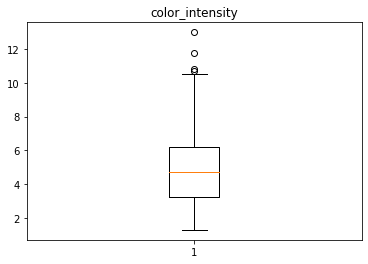

In [2]:
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [3]:
import numpy as np

def outliers_iqr(dt, col):
  quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
  iqr = quartile_3 - quartile_1
  lower_whis = quartile_1 - (iqr * 1.5)
  upper_whis = quartile_3 + (iqr * 1.5)
  outliers = dt[(dt[col] < lower_whis) | (dt[col] > upper_whis)]
  return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 3. 이상치 정제
**이상치 제거**

In [4]:
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


**이상치 대체**

In [7]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN

print(wine['color_intensity'])
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

0       5.64
1       4.38
2       5.68
3       7.80
4       4.32
       ...  
173     7.70
174     7.30
175    10.20
176     9.30
177     9.20
Name: color_intensity, Length: 178, dtype: float64


151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

## 제3절. 범주형 변수 처리
범주형 변수(Categorical Data)는 몇 개의 부류나 범위, 서열 등으로 구분하여 수집된 변수로 질적 변수(Qualitative Variable)라고도 한다. 범주형 변수는 주로 문자열 데이터로 DataFrame에서 object나 category형으로 저장되며, 숫자 값인 경우에도 수학적 의미는 가지지 않기 때문에 덧셈과 같은 수학적 연산의 개념을 적용할 수 없다. 성별, 직업과 같은 명목형 변수와 교육 수준, 만족도와 같은 순서형 변수가 여기에 포함된다.
```
pandas.get_dummies(data, columns=['범주형1', '범주형2'])
```

In [26]:
from sklearn.datasets import load_iris

iris_load = load_iris()
iris = pd.DataFrame(
  iris_load.data,
  columns=[col.replace(' ', '_') for col in iris_load.feature_names]
)
iris['class'] = iris_load.target
iris['class'] = iris['class'].map(
  {
    0:'Setosa',
    1:'Versicolour',
    2:'Virginica'
  }
)
iris

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [27]:
iris_dummy = pd.get_dummies(iris, columns=['class'])
iris_dummy

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class_Setosa,class_Versicolour,class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 제4절. 데이터 분할
분석 모델을 학습하고 성과를 확인하기 위해서는 데이터를 Train과 Test 세트로 나누고 독립변수와 종속변수를 분리해야 한다. 머신러닝 등 분석 방법에 따라서는 Train과 Validation, Test 세트로 분리하기도 한다.
**데이터 분할**
```
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  arrays,
  test_size=None,
  train_size=None,
  random_state=None,
  shuffle=True,
  stratify=None
)
```
- x : 독립변수 테이블
- y : 종속변수 테이블
- random_state : 임의의 번호 지정, 같은 숫자를 사용하면 같은 출력이 나옴
- shuffle : True이면 추출 전에 데이터를 섞음, False면 섞지 않음
- stratify : None이 아닌 경우 데이터는 지정한 변수를 기준으로 계층화되어 해당 변수의 비율을 유지하도록 추출

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  iris.drop(columns='class'),
  iris['class'],
  test_size=0.2,
  random_state=1004
)
print('x_train :', x_train.shape, ' x_test', x_test.shape)
print('y_train :', y_train.shape, ' y_test', y_test.shape)

x_train : (120, 4)  x_test (30, 4)
y_train : (120,)  y_test (30,)


In [32]:
x_train.head(3)

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0


In [33]:
y_train.head(3)

87     Versicolour
67     Versicolour
131      Virginica
Name: class, dtype: object

In [34]:
iris['class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: class, dtype: int64

In [35]:
y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: class, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
  iris.drop(columns='class'),
  iris['class'],
  test_size=0.2,
  stratify=iris['class']
)
print('x_train :', x_train.shape, ' x_test :', x_test.shape)
print('y_train :', y_train.shape, ' y_test :', y_test.shape)

x_train : (120, 4)  x_test : (30, 4)
y_train : (120,)  y_test : (30,)


In [37]:
y_train.value_counts()

Virginica      40
Setosa         40
Versicolour    40
Name: class, dtype: int64

## 제5절. 데이터 스케일링
**데이터 스케일링 방법**
1. Scaler 선택 및 import
2. Scaler 객체 생성
3. train 데이터의 분포 저장 : scaler.fit(x_train)
4. train 데이터 스케일링 : scaler.transform(x_train)
5. test 데이터 스케일링 : scaler.transform(x_test)
6. 원래 스케일로 변환 : scaler.inverse_transform(x_train_scaled)

**표준화(Standardization)**\
표준화는 각 컬럼의 평균을 0, 분산을 1인 정규 분포로 만드는 방법이다.

**정규화(Normalization)**\
정규화는 각 컬럼들의 값이 특정 범위(주로 0~1)안에 들어가도록 스케일링하는 방법이다.

**Standard Scaler**\
Standard Scaler는 표준화 방식으로 기본 스케일링 방식으로 컬럼들을 평균이 0, 분산이 1인 정규분포로 스케일링한다.\
최솟값과 최댓값의 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용하는 것이 좋다.\
회귀보다 분류분석에 유용하다.

In [39]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()

stdScaler.fit(x_train)
x_train_scaled = stdScaler.transform(x_train)

x_test_scaled = stdScaler.transform(x_test)

print('\t\t(min, max) (mean, std)')
print('train_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_train_scaled.min(), x_train_scaled.max(), x_train_scaled.mean(), x_train_scaled.std()))
print('test_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_test_scaled.min(), x_test_scaled.max(), x_test_scaled.mean(), x_test_scaled.std()))

		(min, max) (mean, std)
train_scaled (-2.41, 2.59) (-0.00, 1.00)
test_scaled (-1.95, 3.05) (0.01, 1.00)


**Min-max Scaler**\
Min-max Scaler는 정규화 방식으로 컬럼들을 0과 1 사이의 값으로 스케일링하는 방식이며 최솟값이 0, 최댓값이 1이 된다.\
이상치에 매우 민감하므로 이상치를 미리 정제한 후 수행하는 것이 좋다.\
분류보다는 회귀에 유용한 방식이다.

In [40]:
from sklearn.preprocessing import MinMaxScaler

mmScaler = MinMaxScaler()

mmScaler.fit(x_train)
x_train_scaled = mmScaler.transform(x_train)

x_test_scaled = mmScaler.transform(x_test)

print('\t\t(min, max) (mean, std)')
print('train_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_train_scaled.min(), x_train_scaled.max(), x_train_scaled.mean(), x_train_scaled.std()))
print('test_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_test_scaled.min(), x_test_scaled.max(), x_test_scaled.mean(), x_test_scaled.std()))

		(min, max) (mean, std)
train_scaled (0.00, 1.00) (0.45, 0.27)
test_scaled (-0.03, 1.09) (0.46, 0.27)


**Max Abs Scaler**\
Max Abs Scaler는 최대 절댓값이 1, 0이 0이 되도록 스케일링하는 정규화 방식으로 모든 값은 -1과 1사이에 표현되며, 데이터가 양수인 경우 Min-max Scaler와 결과가 동일하다.\
이상치에 매우 민감하며, 분류보다는 회귀분석에 유용하다.

In [41]:
from sklearn.preprocessing import MaxAbsScaler

maScaler = MaxAbsScaler()

maScaler.fit(x_train)
x_train_scaled = maScaler.transform(x_train)

x_test_scaled = maScaler.transform(x_test)

print('\t\t(min, max) (mean, std)')
print('train_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_train_scaled.min(), x_train_scaled.max(), x_train_scaled.mean(), x_train_scaled.std()))
print('test_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_test_scaled.min(), x_test_scaled.max(), x_test_scaled.mean(), x_test_scaled.std()))

		(min, max) (mean, std)
train_scaled (0.04, 1.00) (0.62, 0.24)
test_scaled (0.04, 1.05) (0.62, 0.24)


**Robust Scaler**\
Robust Scaler는 평균과 분산 대신 중앙값(Median)과 사분위 값을 활용하는 방식으로, 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화한다.\
quantile_range 파라미터(default [0.25, 0.75])를 조정하여 더 넓거나 좁은 범위의 값을 이상치로 설정하여 정제할 수 있다.

In [42]:
from sklearn.preprocessing import RobustScaler

rbScaler = RobustScaler()

rbScaler.fit(x_train)
x_train_scaled = rbScaler.transform(x_train)

x_test_scaled = rbScaler.transform(x_test)

print('\t\t(min, max) (mean, std)')
print('train_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_train_scaled.min(), x_train_scaled.max(), x_train_scaled.mean(), x_train_scaled.std()))
print('test_scaled (%.2f, %.2f) (%.2f, %.2f)' % (x_test_scaled.min(), x_test_scaled.max(), x_test_scaled.mean(), x_test_scaled.std()))

		(min, max) (mean, std)
train_scaled (-1.67, 2.00) (-0.03, 0.61)
test_scaled (-1.33, 2.33) (-0.02, 0.60)


**원본 스케일로 변경하기**
```
scaler.inverse_transform()
```

In [43]:
pd.DataFrame(x_train_scaled).head(3)

,0,1,2,3
0,0.384615,-0.833333,0.185714,0.400000
1,-0.538462,0.500000,-0.757143,-0.533333
2,-0.538462,-0.833333,-0.385714,-0.133333


In [44]:
x_train_rollback = rbScaler.inverse_transform(x_train_scaled)

pd.DataFrame(x_train_rollback).head(3)

,0,1,2,3
0,6.3,2.5,5.0,1.9
1,5.1,3.3,1.7,0.5
2,5.1,2.5,3.0,1.1


## 제6절. 차원 축소(Dimensionality Reduction)
### 1. 설명변수 선택
차원을 축소하는 가장 간단한 방법은 자료를 설명하는 데 몇 가지 설명변수만을 선택하여 분석에 사용하는 방법이다.\
가장 간단하고 해석이 쉬운 방법으로 유용하지 않거나 상관관계가 높은 컬럼은 제거한다.\
다만 설명변수 간의 고차원적인 상관관계는 고려하기 어렵다는 단점이 있다.
### 2. 주성분 분석(PCA; Principal Component Analysis)
주성분 분석은 차원 축소에서 가장 많이 사용되는 차원 추출의 방법이다.\
차원 추출은 기존의 컬럼을 새롭게 해석하여 저차원의 초평면에 추영하는 것이다.\
주성분 분석은 여러 변수 간에 존재하는 상관관계를 이용하는 차원 축소 방법으로 데이터를 축에 사영했을 때 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정하는 방법이다.

**1. PCA를 위한 전처리**\
수치형 데이터만 추출하여 정규화
```
x = data[['수치형 변수1', '수치형 변수2']]

from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
```


In [47]:
x = iris.drop(columns = 'class')

from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

pd.DataFrame(x_scaled).head()


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**2. 주성분 추출**\
생성할 주성분의 개수를 임시로 선택하고 scikit-learn의 PCA를 사용하여 주성분을 추출한다.\
여기서 singular_values_는 전체 데이터에서 해당 모델(설정된 주성분의 개수)로 설명할 수 있는 고유값, explained_variance_ratio_는 전체 데이터에서 각 주성분이 설명할 수 있는 분산의 비율을 의미한다.
```
from sklearn.decomposition import PCA

pca = PCA(n_components=int) # n_components : 생성할 주성분의 갯수
pca_fit = pca.fit(x)

print('고유값 :', pca.singular_values_)
print('분산 설명력 :', pca.explained_variance_ratio)
```

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_fit = pca.fit(x)

print('고유값 :', pca.singular_values_)
print('분산 설명력 :', pca.explained_variance_ratio_)

고유값 : [25.09996044  6.01314738  3.41368064  1.88452351]
분산 설명력 : [0.92461872 0.05306648 0.01710261 0.00521218]


**Scree Plot으로 사용할 주성분의 개수 정하기**\
Scree Plot은 주성분 각각으로 설명할 수 있는 분산의 정도를 점으로 표시하고 각 점들을 이은 선이다.\
주성분 개수가 증가할수록 Scree Plot의 기울기(분산의 변화 정도)는 감소한다.\
보통 플롯의 기울기가 급격히 감소하는 지점의 직전까지를 주성분으로 선택한다.
```
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_, 'o-')
```

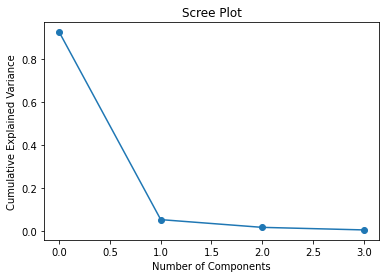

In [58]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

**4. 새로운 데이터프레임 확인**\
주성분의 수를 정하고 **2**를 다시 수행하여 주성분 객체를 생성하고, fit_transform()을 수행하여 원하는 개수의 주성분을 가진 데이터프레임을 만든다.
```
from sklearn.decomposition import PCA

pca = PCA(n_components=n)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2']
```

In [61]:
pca = PCA(n_components=2)

pca_comp = pca.fit_transform(x)
pca_iris = pd.DataFrame(
  data=pca_comp,
  columns=['pc1', 'pc2']
)
pca_iris.head()

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


**5. 주성분 산포도 확인**\
주성분 데이터프레임의 산포도를 다시 확인하면 원본 데이터프레임으로 그린 산포도보다 종속변수를 더 잘 설명하는 산포도를 확인할 수 있다.

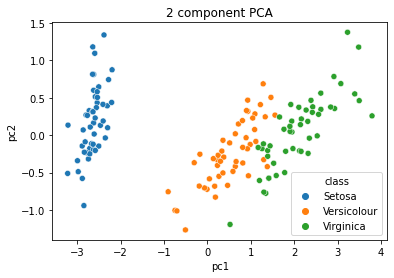

In [63]:
import seaborn as sns

plt.title('2 component PCA')
sns.scatterplot(
  x='pc1',
  y='pc2',
  hue=iris['class'],
  data=pca_iris
)
plt.show()

## 제7절. 데이터 불균형 문제 처리
정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확히 분류하는 것이 더 중요하다.\
보통 이상 데이터가 target값이 되는 경우가 많기 때문이다.\
이상 데이터가 target이 되는 가장 대표적인 예는 암환자 분류 문제가 있다.

**오차행렬(Confusion Matrix; 혼동행렬)
```
      Positive_Predict Negative_Predict
True          TP             FN
False         FP             TN
```
- TP(True Positive) : 양성을 양성이라고 바르게 예측
- FP(False Positive) : 음성을 양성이라고 틀리게 예측(2종 오류)
- FN(False Negative) : 양성을 음성이라고 틀리게 예측(1종 오류)
- TN(True Negative) : 음성을 음성이라고 바르게 예측

오차행렬은 이진분류 모델의 성능평가 기법 중 하나로, 클래스와 값이 True와 False만을 가질 때 4분면의 행렬에 실제 클래스 값과 예측 클래스 값이 어떻게 매핑되는지 표현한 것이다. 오차행렬의 값으로 정확도, 정밀도, 재현율 등 다양한 이진분류 결과 지표를 생성할 수 있으며, 이진분류에서는 이 평가지표를 다각적으로 활용하여 분류 성능을 평가한다. 여기서는 정확도(Accuracy)만을 사용하였으며, 그 식은 아래와 같다. 오차행렬에 대한 더 자세한 설명은 제5장 제3절 성능평가 기법에서 확인할 수 있다.
```
accuracy = (TP + TN) / (TP + TN + FP + FN)
```

### 1. 언더 샘플링(Under Sampling)
언더 샘플링은 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소시키는 기법이다.\
이 기법을 사용하면 데이터 불균형으로 인한 문제는 피할 수 있지만 전체 데이터의 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨리는 결과를 초래할 수 있다.

In [82]:
from sklearn.datasets import make_classification
from collections import Counter

x, y = make_classification(
  n_samples=2000,
  n_features=6,
  weights=[0.95],
  flip_y=0
)
print(Counter(y))

Counter({0: 1900, 1: 100})


**Random Under Sampling**\
랜덤 언더 샘플링은 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방법이다.\
'sampling_strategy' 파라미터를 'majority'로 지정하면 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 줄인다.\
0에서 1사이의 숫자 값을 지정하면 소수 레이블의 데이터 수와 다수 레이블의 데이터 수가 해당 비율이 되도록 조정한다.

In [84]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersampler.fit_resample(x, y)

print(Counter(y_under))

Counter({0: 100, 1: 100})


In [85]:
undersampler = RandomUnderSampler(sampling_strategy=0.5)
x_under2, y_under2 = undersampler.fit_resample(x, y)

print(Counter(y_under2))

Counter({0: 200, 1: 100})


### 2. 오버 샘플링(Over Sampling)
오버 샘플링은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다.\
데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용된다.

**Random Over Sampling**\
랜덤 오버 샘플링은 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다.\
데이터를 단순 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있다.\
오버피팅의 위험성이 있지만 불균형 문제를 처리하지 않는 것보다는 유효하기 때문에 종종 사용된다.

In [86]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversampler.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [87]:
oversampler = RandomOverSampler(sampling_strategy='minority')
x_over2, y_over2 = oversampler.fit_resample(x, y)

print(Counter(y_over2))

Counter({0: 1900, 1: 1900})


**SMOTE(Synthetic Minority Over-sampling Technique)**\
SMOTE는 소수 레이블을 지닌 데이터 세트의 관측 값에 대한 K개의 최근접 이웃(K-Nearest Neighbor)을 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법니다.

In [88]:
from imblearn.over_sampling import SMOTE

smote_sampler = SMOTE(sampling_strategy='minority')
x_smote, y_smote = smote_sampler.fit_resample(x, y)

print(Counter(y_smote))

Counter({0: 1900, 1: 1900})


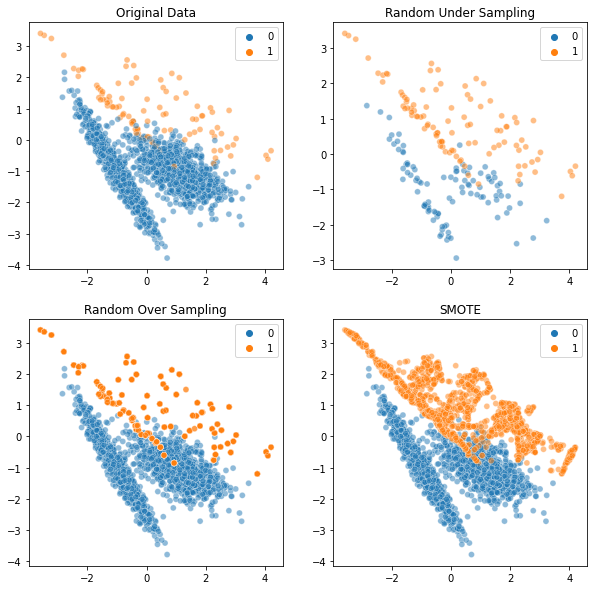

In [96]:
fig, axes = plt.subplots(
  nrows=2,
  ncols=2,
  figsize=(10, 10)
)
sns.scatterplot(
  x=x[:, 1],
  y=x[:, 2],
  hue=y,
  ax=axes[0][0],
  alpha=0.5
)
sns.scatterplot(
  x=x_under[:, 1],
  y=x_under[:, 2],
  hue=y_under,
  ax=axes[0][1],
  alpha=0.5
)
sns.scatterplot(
  x=x_over[:, 1],
  y=x_over[:, 2],
  hue=y_over,
  ax=axes[1][0],
  alpha=0.5
)
sns.scatterplot(
  x=x_smote[:, 1],
  y=x_smote[:, 2],
  hue=y_smote,
  ax=axes[1][1],
  alpha=0.5
)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()